# Data Analysis and Preprocessing of Credit Card

In [2]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys

In [4]:
sys.path.append(os.path.join(os.path.abspath('../..')))

In [5]:
# Import modules
from src import data_loading as dl
from src import data_summarry as ds
from src import formatting as fm
from src import univariate_analysis as uv
from src import bivariate_analysis as ba

In [8]:
# Load the data
credit_df =dl.load_data("creditcard.csv") 

In [9]:
# Data overview
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Credit risk overview 
ds.data_summary(credit_df)

Snapshot:


,
Rows,284807
Columns,31
Missing cells,0 (0.00 %)
Zeros,286142 (3.24 %)
Duplicate rows,1081 (0.38 %)


In [11]:
# Look Data type
ds.data_types(credit_df)

Column Name,Inferred Data Type
Time,numeric
V1,numeric
V2,numeric
V3,numeric
V4,numeric
V5,numeric
V6,numeric
V7,numeric
V8,numeric
V9,numeric


In [13]:
ds.missing_values(credit_df)

There are no missing values


In [14]:
# Checking constant occurences 
ds.constant_occurrence(credit_df)

Column Name,0 Count,0 %
Class,284315,99.827
Amount,1825,0.641
Time,2,0.001
V3,0,0.000
V4,0,0.000
V1,0,0.000
V2,0,0.000
V7,0,0.000
V8,0,0.000
V9,0,0.000


In [16]:
# The class are highyl skewed, let's check in detail
print(f"No Frouds: {round(credit_df['Class'].value_counts(normalize=True)[0] * 100, 2)}% of dataset")
print(f"Frouds: {round(credit_df['Class'].value_counts(normalize=True)[1] * 100, 2)}% of dataset")

No Frouds: 99.83% of dataset
Frouds: 0.17% of dataset


In [11]:
ds.duplicate_row_count(credit_df)

Duplicate Row


,
Duplicate rows column subset,all columns
Duplicate row count,1081
Duplicate row percentage,0.38 %


In [12]:
# Identify duplicated row and drop it
duplicates = credit_df.duplicated()
credit_df = credit_df[~duplicates]

In [13]:
# Confirm the duplicated rows are removed
credit_df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis (EDA)
#### Univariate analysis

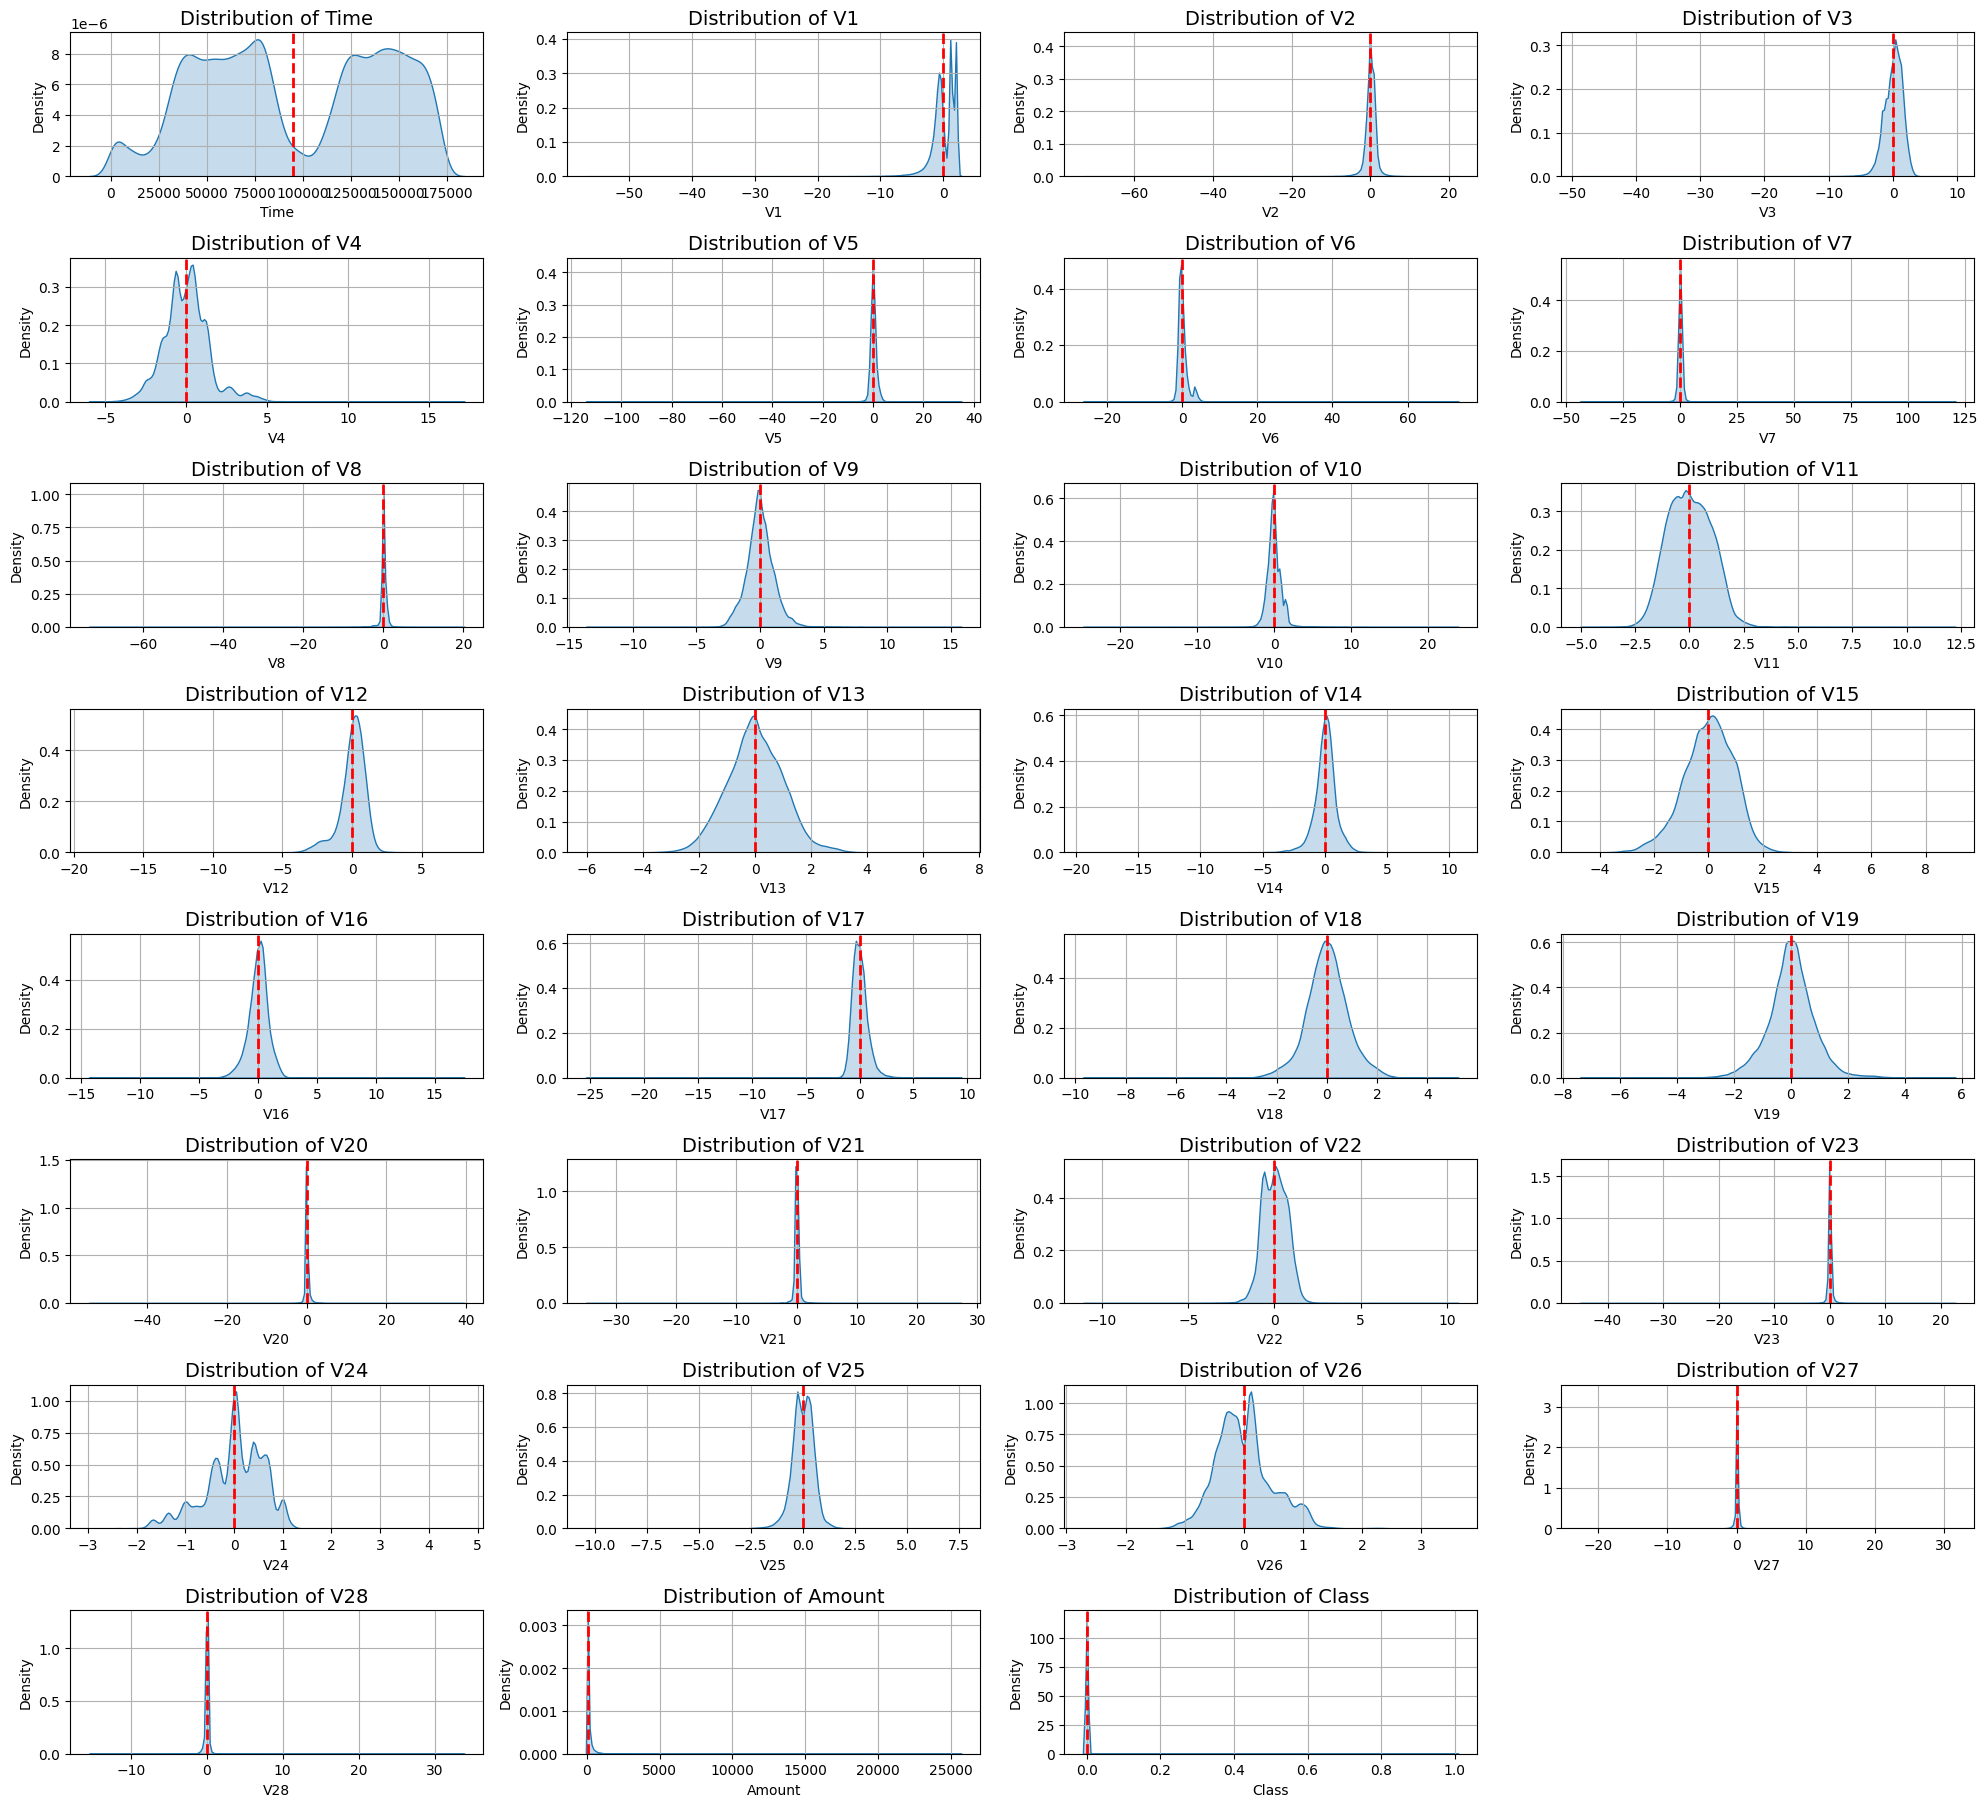

In [26]:
# Plot numerical distribution 
uv.kdeplot_numerical_distribution(credit_df) # Consiering except Time and Amount, class are PCA value i just plotted it to get some sense of the data 

#### Bivariate analysis

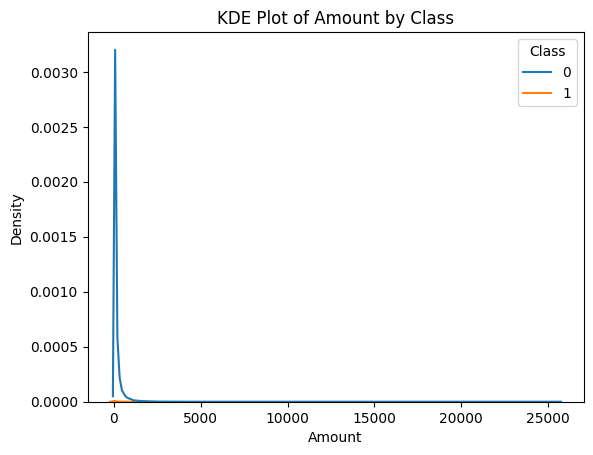

In [30]:
# Call the function
ba.bivariate_kdeplot(credit_df, 'Amount', 'Class')

In [1]:
ba.violinplot(credit_df, 'Amount', 'Class')

NameError: name 'ba' is not defined

- Fraudulent transactions appear predominantly in amounts less than 5000.

- Non-fraudulent transactions vary across the entire range but have a higher concentration in the lower amounts.

- Since our data is highly unbalanced, it is crucial to consider subsampling to ensure accurate analysis.